In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
housing = pd.DataFrame(pd.read_csv('./Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Random seed to randomize the dataset.
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [ ]:
df_test.shape

(109, 13)

In [ ]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_oneAtrain = df_train[num_vars]
df_oneAtest = df_test[num_vars]
df_oneAtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
542,3620,2,1,1,0,1750000
496,4000,2,1,1,0,2695000
484,3040,2,1,1,0,2870000
507,3600,2,1,1,0,2590000
252,9860,3,1,1,0,4515000


In [ ]:
dataset_train = df_oneAtrain.values[:,:]
print(dataset_train[:20,:])

[[   3620       2       1       1       0 1750000]
 [   4000       2       1       1       0 2695000]
 [   3040       2       1       1       0 2870000]
 [   3600       2       1       1       0 2590000]
 [   9860       3       1       1       0 4515000]
 [   3968       3       1       2       0 4410000]
 [   3840       3       1       2       1 4585000]
 [   9800       4       2       2       2 5250000]
 [   3640       2       1       1       0 3570000]
 [   3520       2       2       1       0 3640000]
 [  13200       3       1       2       2 9800000]
 [   2700       2       1       1       0 2940000]
 [   4300       6       2       2       0 6083000]
 [   4500       2       1       1       0 3255000]
 [   4995       4       2       1       0 4893000]
 [   3069       2       1       1       1 3150000]
 [   4352       4       1       2       1 2975000]
 [   8880       3       2       2       1 6930000]
 [  12944       3       1       1       0 3500000]
 [   7160       3       1      

In [ ]:
X_train = df_oneAtrain.values[:,0:5]
Y_train = df_oneAtrain.values[:,5]
len(X_train), len(Y_train)

(436, 436)

In [ ]:
print('X =', X_train[:5])
print('Y =', Y_train[:5])

X = [[3620    2    1    1    0]
 [4000    2    1    1    0]
 [3040    2    1    1    0]
 [3600    2    1    1    0]
 [9860    3    1    1    0]]
Y = [1750000 2695000 2870000 2590000 4515000]


In [ ]:
# Convert to 2D array (381x5)
m = len(X_train)
X_1 = X_train.reshape(m,5)
print("X_1 =", X_1[:5,:])

X_1 = [[3620    2    1    1    0]
 [4000    2    1    1    0]
 [3040    2    1    1    0]
 [3600    2    1    1    0]
 [9860    3    1    1    0]]


In [ ]:
m = len(X_train)
X_0 = np.ones((m,1))
X_0[:5], len(X_0)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 436)

In [ ]:
X_train = np.hstack((X_0, X_1))
X_train[:5]

array([[1.00e+00, 3.62e+03, 2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 4.00e+03, 2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 3.04e+03, 2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 3.60e+03, 2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 9.86e+03, 3.00e+00, 1.00e+00, 1.00e+00, 0.00e+00]])

In [ ]:
theta = np.zeros((6,1))
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
"""
Compute loss for linear regression for one time.

Input Parameters
X : 2D array for training example
    m = number of training examples
    n = number of features
Y : 1D array of label/target values. Dimension: m

theta : 2D array of fitting parameters. Dimension: n,1

Output Parameters
J : Loss
"""

def compute_loss(X, Y, theta):
    predictions = X.dot(theta) #prediction = h
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
cost = compute_loss(X_train, Y_train, theta)
print("Cost loss for all given theta =", cost)

Cost loss for all given theta = 5770455632864301.0


In [ ]:
"""
Compute loss for l inear regression for all iterations

Input Parameters
X: 2D array, Dimension: m x n
    m = number of training data point
    n = number of features
Y: 1D array of labels/target value for each training data point. Dimension: m
theta: 2D array of fitting parameters or weights. Dimension: (n,1)
alpha : learning rate
iterations: Number of iterations.

Output Parameters
theta: Final Value. 2D array of fitting parameters or weights. Dimension: n,1
loss_history: Contains value of cost at each iteration. 1D Array. Dimension: m
"""

def gradient_descent(X, Y, theta, alpha, iterations):
    loss_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta) # prediction (m,1) = temp
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta; # theta (n,1)
        loss_history[i] = compute_loss(X, Y, theta)
    return theta, loss_history

In [ ]:
theta = [0., 0., 0., 0., 0., 0.]
iterations = 2000
alpha = 0.0000000001

In [ ]:
theta, loss_history = gradient_descent(X_train, Y_train, theta, alpha, iterations)
print("Final value of theta =", theta)
print("loss_history =", loss_history)

Final value of theta = [2.10706875e-01 8.59342478e+02 6.95613564e-01 3.37363756e-01
 4.94874817e-01 1.85598518e-01]
loss_history = [1.31633712e+13 1.30921973e+13 1.30214655e+13 ... 1.70465861e+12
 1.70465832e+12 1.70465804e+12]


In [ ]:
df_oneAtest.head()

,area,bedrooms,bathrooms,stories,parking,price
239,4000,3,1,2,1,4585000
113,9620,3,1,1,2,6083000
325,3460,4,1,2,0,4007500
66,13200,2,1,1,1,6930000
479,3660,4,1,2,0,2940000


In [ ]:
dataset_test = df_oneAtest.values[:,:]
print(dataset_test[:20,:])

[[   4000       3       1       2       1 4585000]
 [   9620       3       1       1       2 6083000]
 [   3460       4       1       2       0 4007500]
 [  13200       2       1       1       1 6930000]
 [   3660       4       1       2       0 2940000]
 [   6350       3       2       3       0 6195000]
 [   3850       3       1       1       2 3535000]
 [   3480       3       1       2       1 2940000]
 [   3512       2       1       1       1 3500000]
 [   9000       4       2       4       2 7980000]
 [   6000       4       2       4       0 6755000]
 [   3960       3       1       2       0 3990000]
 [   3450       3       1       2       0 3150000]
 [   6060       3       1       1       0 3290000]
 [   5985       3       1       1       0 4130000]
 [   2430       3       1       1       0 2660000]
 [   4900       2       1       2       0 4410000]
 [   6020       3       1       1       0 3710000]
 [   3100       3       1       2       0 3360000]
 [   4500       2       1      

In [ ]:
X_test = df_oneAtest.values[:,0:5]
Y_test = df_oneAtest.values[:,5]
len(X_test), len(Y_test)

(109, 109)

In [ ]:
print('X =', X_test[:5])
print('Y =', Y_test[:5])

X = [[ 4000     3     1     2     1]
 [ 9620     3     1     1     2]
 [ 3460     4     1     2     0]
 [13200     2     1     1     1]
 [ 3660     4     1     2     0]]
Y = [4585000 6083000 4007500 6930000 2940000]


In [ ]:
# Convert to 2D array (164x5)
m = len(X_test)
X_1 = X_test.reshape(m,5)
print("X_1 =", X_1[:5,:])

X_1 = [[ 4000     3     1     2     1]
 [ 9620     3     1     1     2]
 [ 3460     4     1     2     0]
 [13200     2     1     1     1]
 [ 3660     4     1     2     0]]


In [ ]:
# Create theta zero.
m = len(X_test)
X_0 = np.ones((m,1))
X_0[:5], len(X_0)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 109)

In [ ]:
X_test = np.hstack((X_0, X_1))
X_test[:5]

array([[1.00e+00, 4.00e+03, 3.00e+00, 1.00e+00, 2.00e+00, 1.00e+00],
       [1.00e+00, 9.62e+03, 3.00e+00, 1.00e+00, 1.00e+00, 2.00e+00],
       [1.00e+00, 3.46e+03, 4.00e+00, 1.00e+00, 2.00e+00, 0.00e+00],
       [1.00e+00, 1.32e+04, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 3.66e+03, 4.00e+00, 1.00e+00, 2.00e+00, 0.00e+00]])

In [ ]:
theta_test = np.zeros((6,1))
theta_test

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
cost_test = compute_loss(X_test, Y_test, theta_test)
print("Cost loss for all given theta =", cost_test)

Cost loss for all given theta = 1372813785875000.2


In [ ]:
theta_test = [0., 0., 0., 0., 0., 0.]
iterations = 2000
alpha = 0.0000000001

In [ ]:
theta_test, loss_history_test = gradient_descent(X_test, Y_test, theta_test, alpha, iterations)
print("Final value of theta =", theta_test)
print("loss_history =", loss_history_test)

Final value of theta = [2.20563091e-01 8.33364199e+02 7.01107689e-01 3.53112759e-01
 5.07468404e-01 1.38571784e-01]
loss_history = [1.25245899e+13 1.24550016e+13 1.23858541e+13 ... 1.53978999e+12
 1.53978978e+12 1.53978956e+12]


Text(0.5, 1.0, 'Convergence of gradient descent')

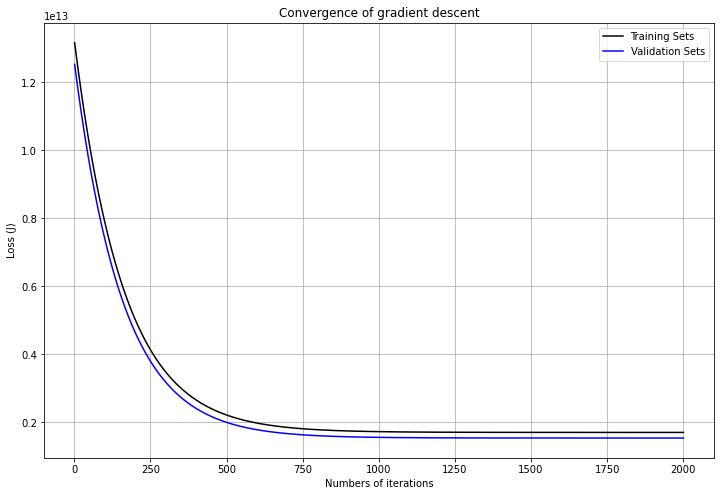

In [ ]:
plt.plot(range(1, iterations + 1), loss_history, color = 'black')
plt.plot(range(1, iterations + 1), loss_history_test, color = 'blue')
plt.rcParams["figure.figsize"] = [12,8]
plt.grid()
plt.legend(['Training Sets', 'Validation Sets'])
plt.xlabel("Numbers of iterations")
plt.ylabel("Loss (J)")
plt.title("Convergence of gradient descent")